Step 0 : Import Libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import shap

c:\anaconda3\envs\torch_gpu_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Step 1 : Load the Data

In [2]:
df = pd.read_csv("Car_Price.csv")

In [3]:
# Print initial data information to understand the dataset
print("First Five Rows:\n")
df.head()

First Five Rows:



,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,130000


In [4]:
# Print initial data information to understand the dataset
print("Last Five Rows:\n")
df.tail()

Last Five Rows:



,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,selling_price
8123,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,320000
8124,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0,135000
8125,Maruti Swift Dzire ZDi,2009,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0,382000
8126,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0,290000
8127,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0,290000


In [5]:
print("Data Shape:", df.shape)

Data Shape: (8128, 12)


In [6]:
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   mileage(km/ltr/kg)  7907 non-null   float64
 8   engine              7907 non-null   float64
 9   max_power           7913 non-null   object 
 10  seats               7907 non-null   float64
 11  selling_price       8128 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [7]:
print("Statistical Summary : ")
df.describe()

Statistical Summary : 


,year,km_driven,mileage(km/ltr/kg),engine,seats,selling_price
count,8128.000000,8.128000e+03,7907.000000,7907.000000,7907.000000,8.128000e+03
mean,2013.804011,6.981951e+04,19.418783,1458.625016,5.416719,6.382718e+05
std,4.044249,5.655055e+04,4.037145,503.916303,0.959588,8.062534e+05
min,1983.000000,1.000000e+00,0.000000,624.000000,2.000000,2.999900e+04
25%,2011.000000,3.500000e+04,16.780000,1197.000000,5.000000,2.549990e+05
50%,2015.000000,6.000000e+04,19.300000,1248.000000,5.000000,4.500000e+05
75%,2017.000000,9.800000e+04,22.320000,1582.000000,5.000000,6.750000e+05
max,2020.000000,2.360457e+06,42.000000,3604.000000,14.000000,1.000000e+07


Step 2 : Data Cleaning & Preprocessing

In [8]:
# check Missing value
print("Check Missing values :")
df.isnull().sum()

Check Missing values :


name                    0
year                    0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
selling_price           0
dtype: int64

In [9]:
# Drop duplicates 
df.drop_duplicates(inplace=True)

In [10]:
# Remove rows with missing values
df.dropna(inplace=True)

In [11]:
df.rename(columns={'selling_price': 'price'}, inplace=True)
df.rename(columns={'mileage(km/ltr/kg)': 'Mileage'}, inplace=True)
df.rename(columns={'engine': 'Engine'}, inplace=True)
df.rename(columns={'max_power': 'Power'}, inplace=True)



In [12]:
# Remove any irrelevant columns (for example: 'Unnamed: 0', 'ID', 'Model')
drop_cols = ['Unnamed: 0', 'ID', 'Model']
existing_drop_cols = [col for col in drop_cols if col in df.columns]
df.drop(columns=existing_drop_cols, inplace=True)

In [13]:
# Encode categorical columns (car brand or fuel type) into numeric values
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
#Create a new feature if 'Year' exists (calculate the car's age)
if 'Year' in df.columns:
    current_year = pd.Timestamp.now().year
    df['Car_Age'] = current_year - df['Year']


In [15]:
# Remove outliers in Price using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

Step 3 : Exploratory Data Analysis (EDA) & Visualization

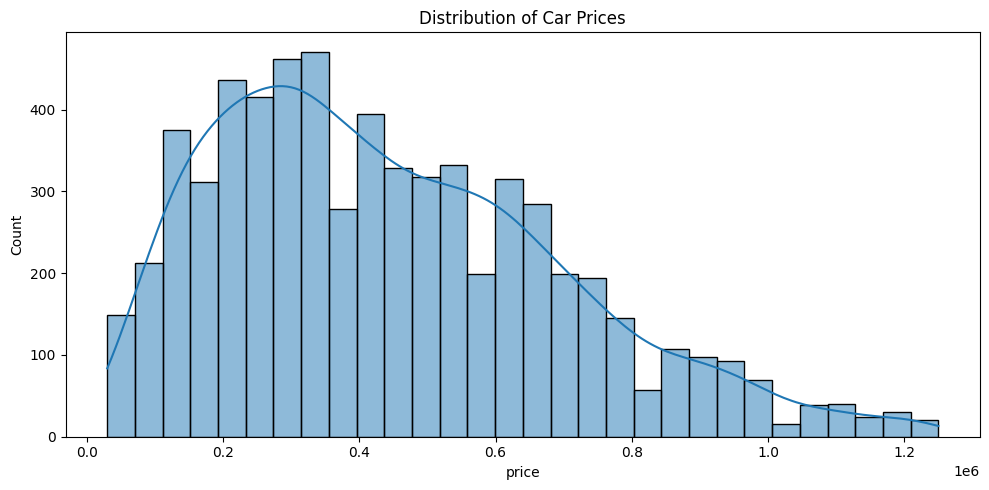

In [16]:
# Visualization 1: Distribution of Car Prices
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Distribution of Car Prices")
plt.xlabel("price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


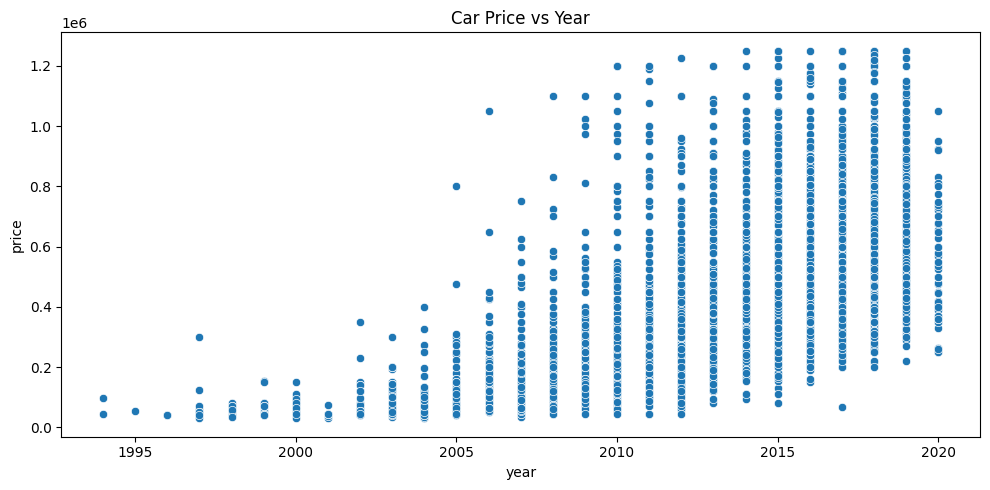

In [17]:
# Visualization 2: Car Price vs Year (if 'Year' exists)
if 'year' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x='year', y='price')
    plt.title("Car Price vs Year")
    plt.xlabel("year")
    plt.ylabel("price")
    plt.tight_layout()
    plt.savefig("eda_price_vs_year.png")
    plt.show()


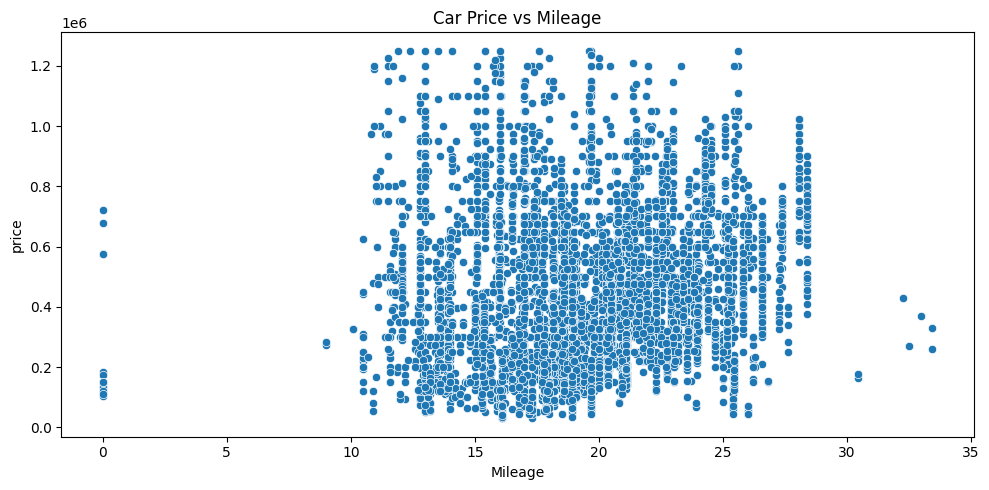

In [18]:
# Visualization 3: Car Price vs Mileage (if 'Mileage' exists)
if 'Mileage' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x='Mileage', y='price')
    plt.title("Car Price vs Mileage")
    plt.xlabel("Mileage")
    plt.ylabel("price")
    plt.tight_layout()
    plt.savefig("eda_price_vs_mileage.png")
    plt.show()

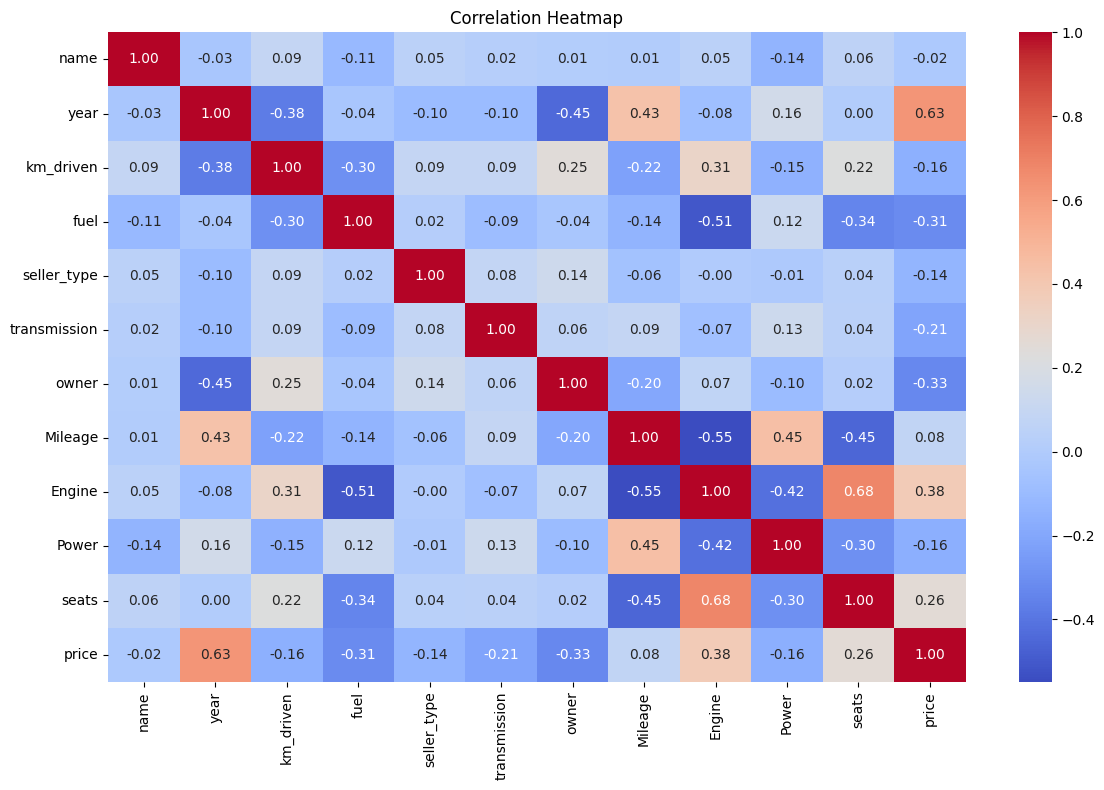

In [19]:
# Visualization 4: Heatmap of Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("eda_correlation_heatmap.png")
plt.show()

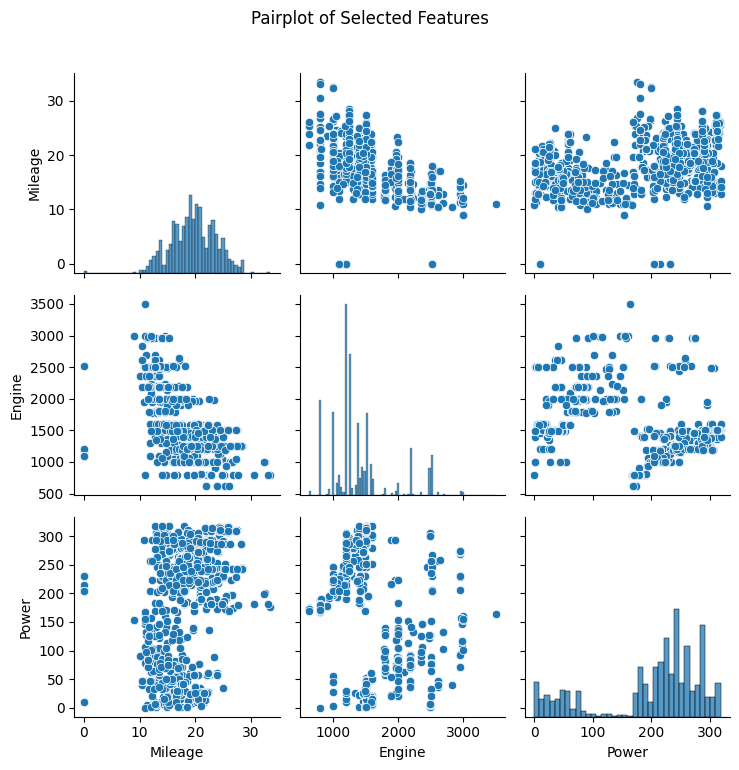

In [20]:
# Visualization 5: Pairplot of selected features (if available)
selected_features = [col for col in ['Price', 'Year', 'Mileage', 'Engine', 'Power'] if col in df.columns]
if len(selected_features) >= 2:
    sns.pairplot(df[selected_features])
    plt.suptitle("Pairplot of Selected Features", y=1.02)
    plt.tight_layout()
    plt.savefig("eda_pairplot.png")
    plt.show()

Step 4 : Data Splitting for Modeling

In [21]:
# Separate the target variable ('Price') from the features
X = df.drop('price', axis=1)
y = df['price']

In [22]:
#Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5 :Model Training & Evaluation

In [24]:
# Linear Regression Model

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)

# Evaluate performance
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Store results
results = {}
results['Linear Regression'] = {
    "RMSE": rmse_linear,
    "MAE": mae_linear,
    "R²": r2_linear
}

# Print metrics
print("\nLinear Regression")
print("RMSE:", rmse_linear)
print("MAE:", mae_linear)
print("R² Score:", r2_linear)



Linear Regression
RMSE: 155028.5076549018
MAE: 120431.98351689862
R² Score: 0.6413528715327657


In [25]:
# Decision Tree Regressor

# Train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test data
y_pred_tree = tree_model.predict(X_test)

# Evaluate performance
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Store results
results['Decision Tree'] = {
    "RMSE": rmse_tree,
    "MAE": mae_tree,
    "R²": r2_tree
}

# Print metrics
print("\nDecision Tree Regressor")
print("RMSE:", rmse_tree)
print("MAE:", mae_tree)
print("R² Score:", r2_tree)



Decision Tree Regressor
RMSE: 110797.92842217964
MAE: 77101.28007274617
R² Score: 0.8168075773164315


In [26]:
# Random Forest Regressor

# Train the Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Predict on test data
y_pred_forest = forest_model.predict(X_test)

# Evaluate performance
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
mae_forest = mean_absolute_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Store results
results['Random Forest'] = {
    "RMSE": rmse_forest,
    "MAE": mae_forest,
    "R²": r2_forest
}

# Print metrics
print("\nRandom Forest Regressor")
print("RMSE:", rmse_forest)
print("MAE:", mae_forest)
print("R² Score:", r2_forest)


Random Forest Regressor
RMSE: 83448.50064643404
MAE: 58165.410801228514
R² Score: 0.8960842680455341


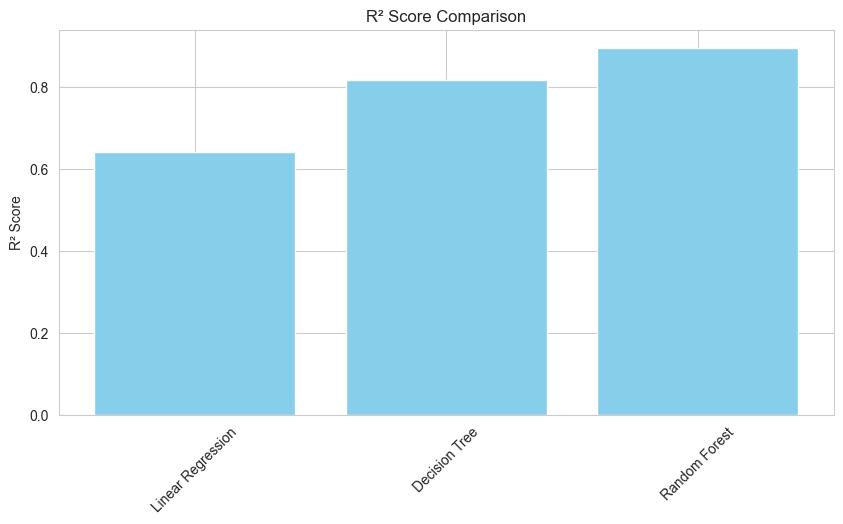

In [36]:
# Compare R² scores visually
model_names = list(results.keys())
r2_scores = [results[m]['R²'] for m in model_names]

plt.figure(figsize=(10,5))
plt.bar(model_names, r2_scores, color='skyblue')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [37]:
# Train the Random Forest model as the best model example
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

Model Evaluation Metrics:
MAE  = 58165.41
MSE  = 6963652260.14
RMSE = 83448.50
R²   = 0.8961
MAPE = 16.02%


C:\Users\ahmed yasser\AppData\Local\Temp\ipykernel_5788\2113581824.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=evaluation_df, x='Metric', y='Score', palette='crest')


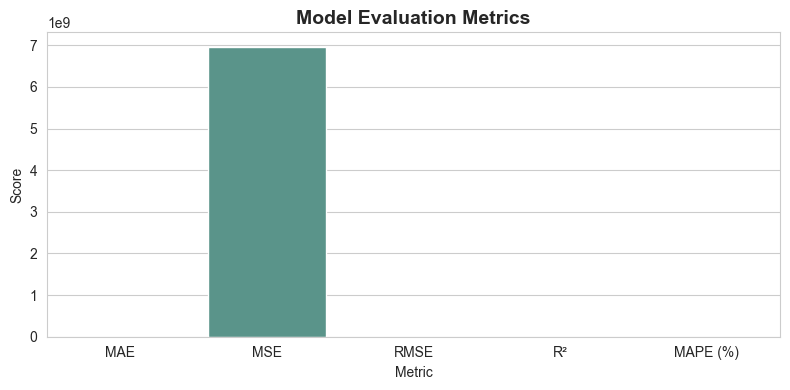

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


mae = mean_absolute_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best)
mape = mean_absolute_percentage_error(y_test, y_pred_best) * 100


print("Model Evaluation Metrics:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")
print(f"MAPE = {mape:.2f}%")

evaluation_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Score': [mae, mse, rmse, r2, mape]
})

plt.figure(figsize=(8, 4))
sns.barplot(data=evaluation_df, x='Metric', y='Score', palette='crest')
plt.title("Model Evaluation Metrics", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

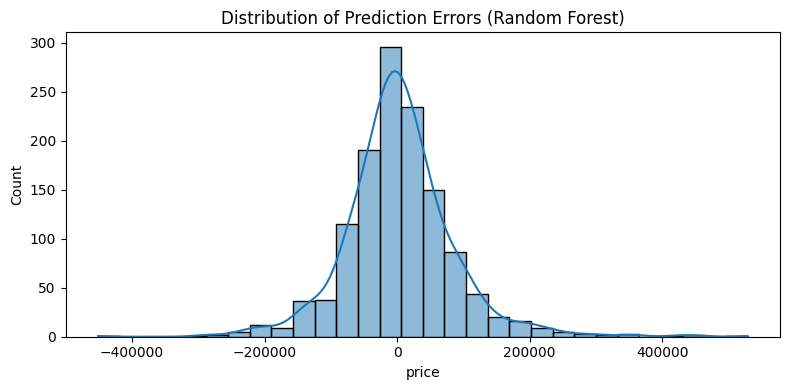

In [61]:
# Visualization 7: Error distribution
errors = y_test - y_pred_best
plt.figure(figsize=(8, 4))
sns.histplot(errors, bins=30, kde=True)
plt.title("Distribution of Prediction Errors (Random Forest)")
plt.tight_layout()
plt.savefig("prediction_error_distribution.png")
plt.show()

Step 6 : Visualizations with Best Model (Random Forest)

In [39]:
importances = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)


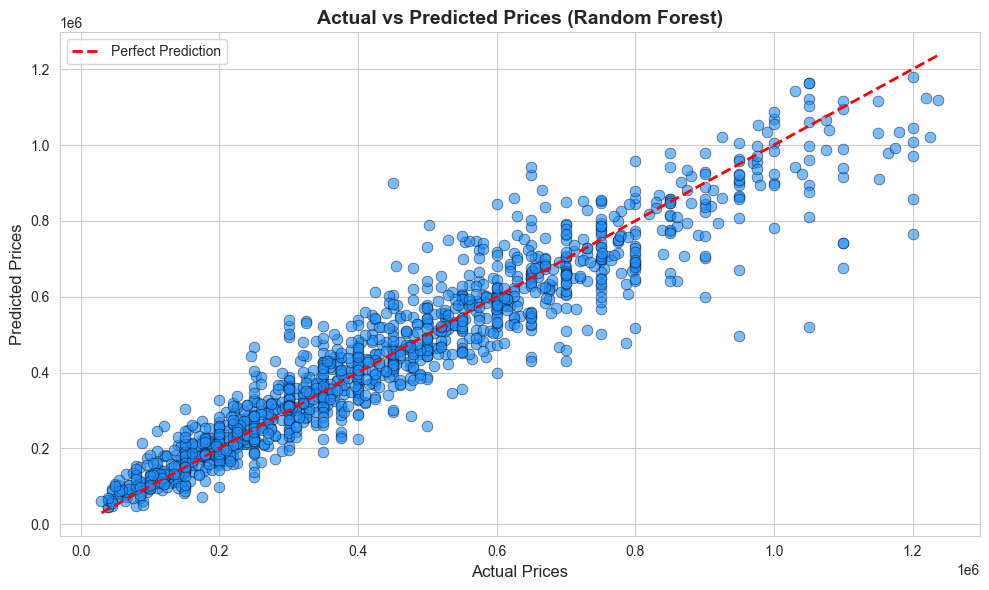

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best, color='dodgerblue', alpha=0.6, s=60, edgecolor='k', linewidth=0.5)
max_val = max(max(y_test), max(y_pred_best))
min_val = min(min(y_test), min(y_pred_best))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label="Perfect Prediction")


plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.title("Actual vs Predicted Prices (Random Forest)", fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()


plt.savefig("prediction_actual_vs_pred_pro.png", dpi=300)
plt.show()


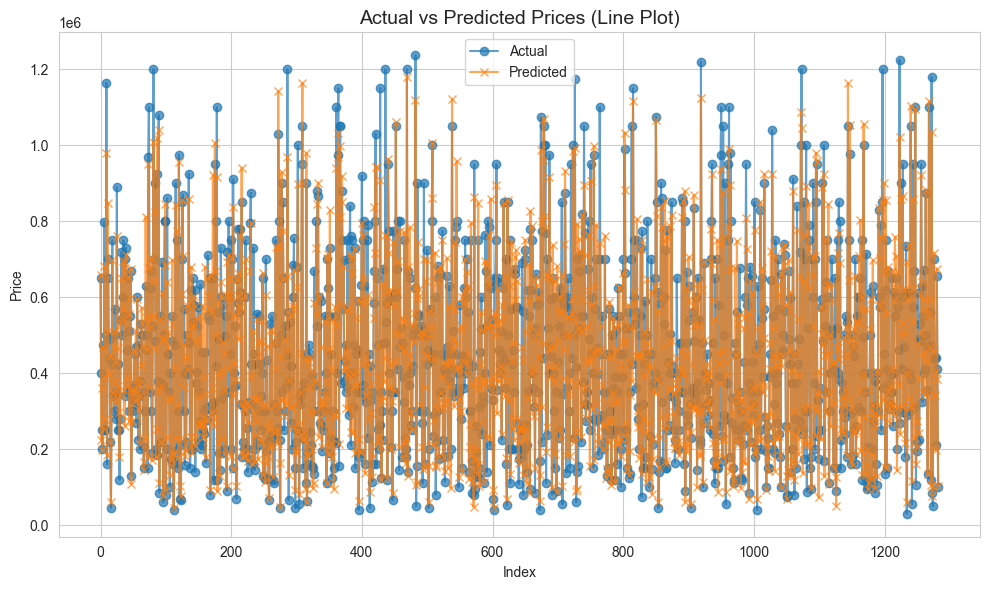

In [35]:
# 🔹 Prediction Error Line Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test.values, label='Actual', marker='o', alpha=0.7)
plt.plot(np.arange(len(y_pred_best)), y_pred_best, label='Predicted', marker='x', alpha=0.7)
plt.title("Actual vs Predicted Prices (Line Plot)", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

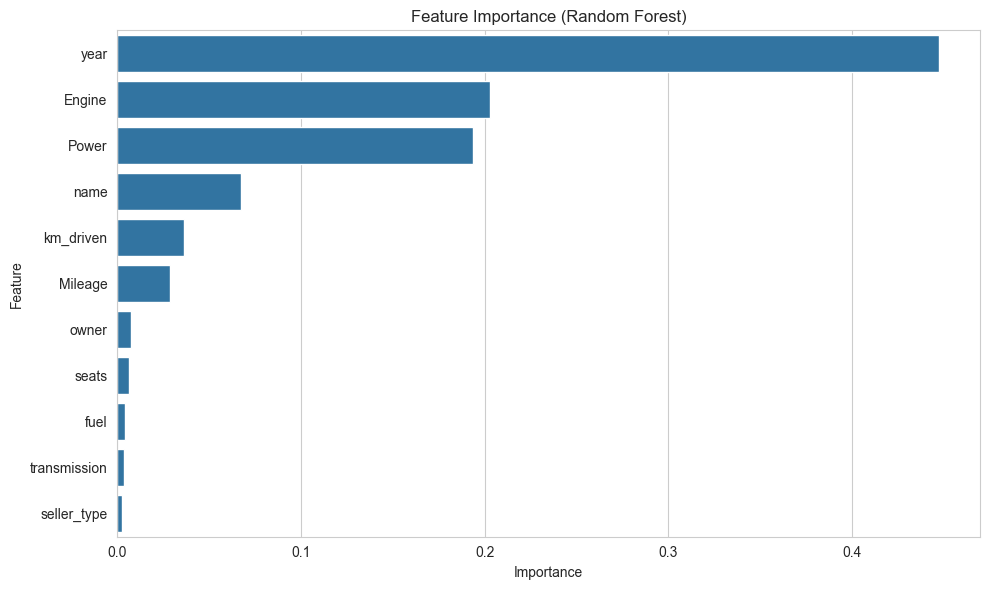

In [40]:
# Visualization 8: Feature Importance Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()

In [41]:
# Save best model
joblib.dump(best_model, "best_random_forest_model.pkl")

['best_random_forest_model.pkl']

Step 7 : Save Cleaned Data and Evaluation Results

In [42]:
# Save the evaluation results to a CSV file
results_df = pd.DataFrame(results).T
results_df.to_csv("model_evaluation_results.csv")

# Save the cleaned dataset to a CSV file
df.to_csv("cleaned_car_data.csv", index=False)

In [43]:
#  Final Summary
print("\nProject executed successfully. The following files have been saved:")
print(" - cleaned_car_data.csv")
print(" - model_evaluation_results.csv")
print(" - best_random_forest_model.pkl")
print(" - eda_price_distribution.png")
print(" - eda_price_vs_year.png (if applicable)")
print(" - eda_price_vs_mileage.png (if applicable)")
print(" - eda_correlation_heatmap.png")
print(" - eda_pairplot.png (if applicable)")
print(" - prediction_actual_vs_pred.png")
print(" - prediction_error_distribution.png")
print(" - feature_importance.png")



Project executed successfully. The following files have been saved:
 - cleaned_car_data.csv
 - model_evaluation_results.csv
 - best_random_forest_model.pkl
 - eda_price_distribution.png
 - eda_price_vs_year.png (if applicable)
 - eda_price_vs_mileage.png (if applicable)
 - eda_correlation_heatmap.png
 - eda_pairplot.png (if applicable)
 - prediction_actual_vs_pred.png
 - prediction_error_distribution.png
 - feature_importance.png
